# Backtesting of strategy based on Stochastic Dominace Contstarints benchmark against equally weighted portfolio

In [11]:
import datetime
from pprint import pprint
import pandas as pd
from matplotlib import pyplot as plt
from src.algorithms.strategy import  EqualyWeighted,StochasticDominance, MeanVariance
from src.datasource.yahoodata import YahooDataSource
from src.backtest.backtest import BackTest


tickers = ['MSFT','MMM', 'AXP', 'AMGN', 'AAPL', 'CSCO','IBM','NVDA','TSLA','AMZN','MRK','QCOM']

column_name = 'Close'
interval = '1d'

start_date = datetime.datetime(2018,1,1)
end_date = datetime.datetime(2023,1,1)

In [12]:
main_data = YahooDataSource(tickers,start_date,end_date,columns=[column_name],interval=interval)
data = main_data.get_data()
all_data = main_data.get_data_by_frequency(start_date,end_date,'1d')
ffill_data = main_data.get_data_by_frequency(start_date,end_date,'1d').ffill()

Adding MSFT to the data source
Getting data for MSFT
Adding MMM to the data source
Getting data for MMM
Adding AXP to the data source
Getting data for AXP
Adding AMGN to the data source
Getting data for AMGN
Adding AAPL to the data source
Getting data for AAPL
Adding CSCO to the data source
Getting data for CSCO
Adding IBM to the data source
Getting data for IBM
Adding NVDA to the data source
Getting data for NVDA
Adding TSLA to the data source
Getting data for TSLA
Adding AMZN to the data source
Getting data for AMZN
Adding MRK to the data source
Getting data for MRK
Adding QCOM to the data source
Getting data for QCOM


In [3]:
equalyWeighted = EqualyWeighted()
StochasticDomin = StochasticDominance(equalyWeighted)
min_var = MeanVariance()
StochasticDominVar = StochasticDominance(min_var)


Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              0.960680
Mean Daily Return         0.000655
Mean Yearly Retrun        0.179270
Mean Daily SP500 Return   0.000256
Mean Yearly SP500 Return  0.066748
Std Dev of Daily Return   0.014162
Sharpe Ratio              0.733698
Sortino Ratio             0.784542
Max Drawdown             -0.305997
Calmar Ratio              3.139507
Alpha                     0.000331
Beta                      1.060253


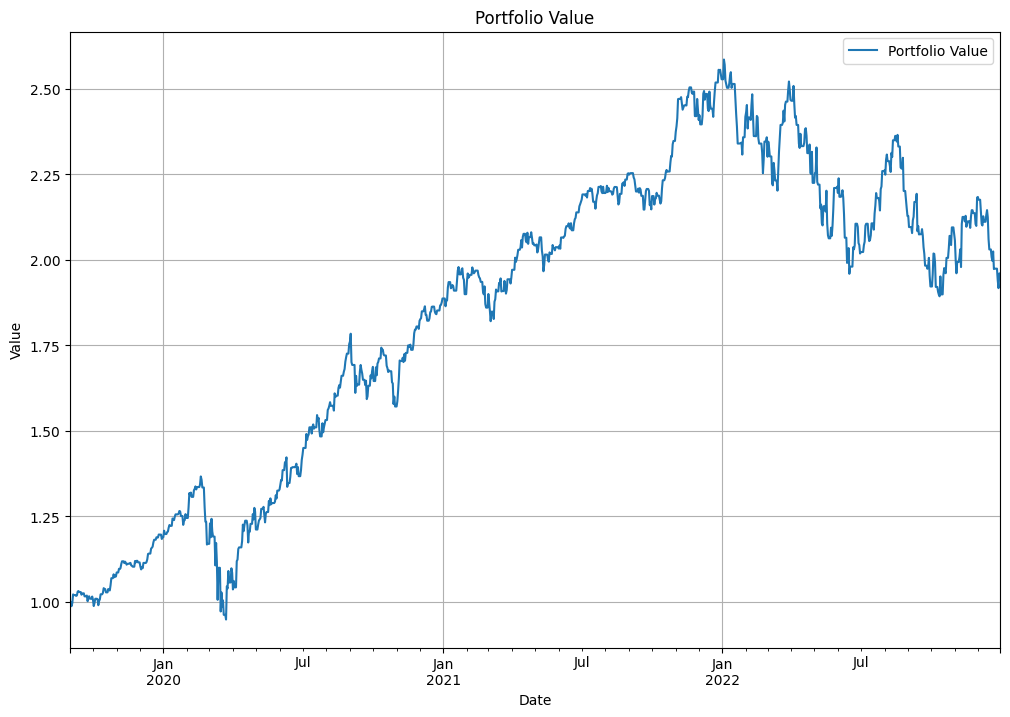

In [4]:

equalyWeighted_bt = BackTest(main_data, equalyWeighted)
equalyWeighted_bt.backtest(start_date, end_date, 20, 1, '1MS')
equalyWeighted_bt.plot_portfolio_returns()
equally_summary = equalyWeighted_bt.get_summary()
print(equally_summary)


Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              0.332566
Mean Daily Return         0.000308
Mean Yearly Retrun        0.080599
Mean Daily SP500 Return   0.000256
Mean Yearly SP500 Return  0.066748
Std Dev of Daily Return   0.011941
Sharpe Ratio              0.409000
Sortino Ratio             0.437497
Max Drawdown             -0.255478
Calmar Ratio              1.301740
Alpha                     0.000059
Beta                      0.814979


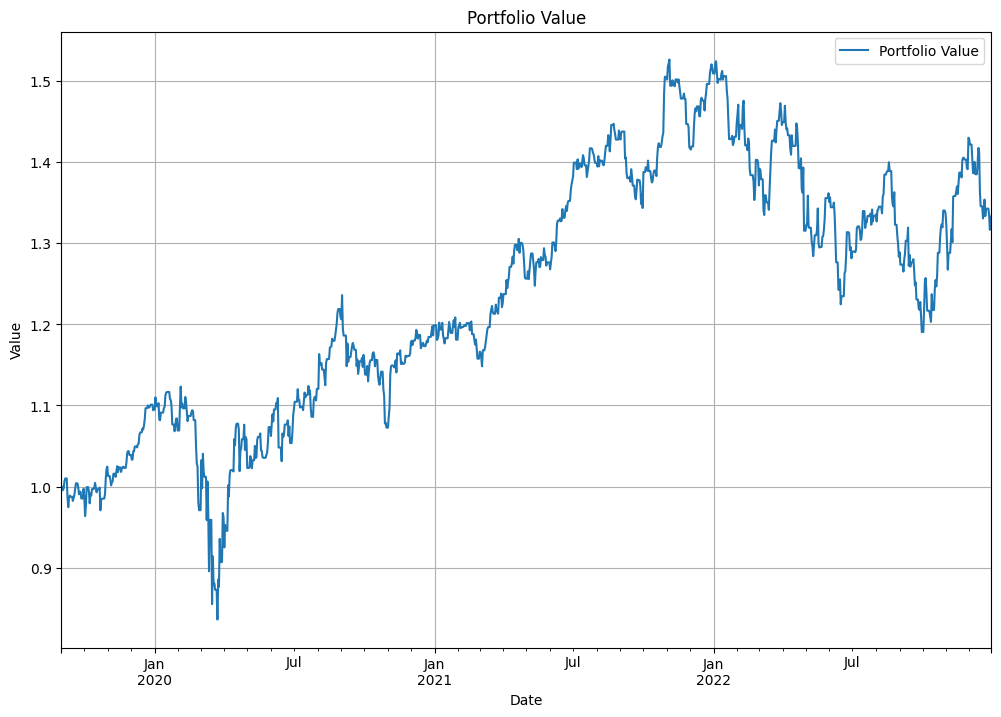

In [5]:
min_var_bt = BackTest(main_data, min_var)
min_var_bt.backtest(start_date, end_date, 20, 1, '1MS')
min_var_bt.plot_portfolio_returns()
min_var_summary = min_var_bt.get_summary()
print(min_var_summary)

Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              1.979477
Mean Daily Return         0.001116
Mean Yearly Retrun        0.324692
Mean Daily SP500 Return   0.000256
Mean Yearly SP500 Return  0.066748
Std Dev of Daily Return   0.020830
Sharpe Ratio              0.850824
Sortino Ratio             0.959774
Max Drawdown             -0.418670
Calmar Ratio              4.728010
Alpha                     0.000746
Beta                      1.215848


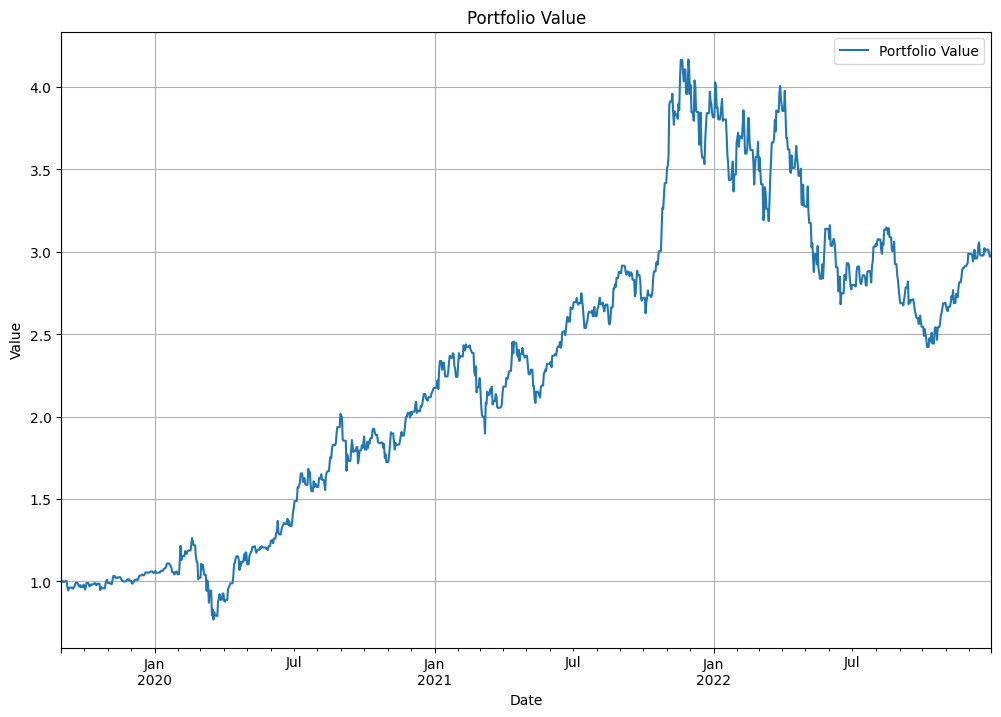

In [6]:
st_dominance = BackTest(main_data, StochasticDomin)
st_dominance.backtest(start_date, end_date, 20, 1, '1MS')
st_dominance.plot_portfolio_returns()
st_dominance_summary = st_dominance.get_summary()
print(st_dominance_summary)

Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              0.662654
Mean Daily Return         0.000571
Mean Yearly Retrun        0.154711
Mean Daily SP500 Return   0.000256
Mean Yearly SP500 Return  0.066748
Std Dev of Daily Return   0.017466
Sharpe Ratio              0.518981
Sortino Ratio             0.597699
Max Drawdown             -0.362025
Calmar Ratio              1.830410
Alpha                     0.000254
Beta                      1.041280


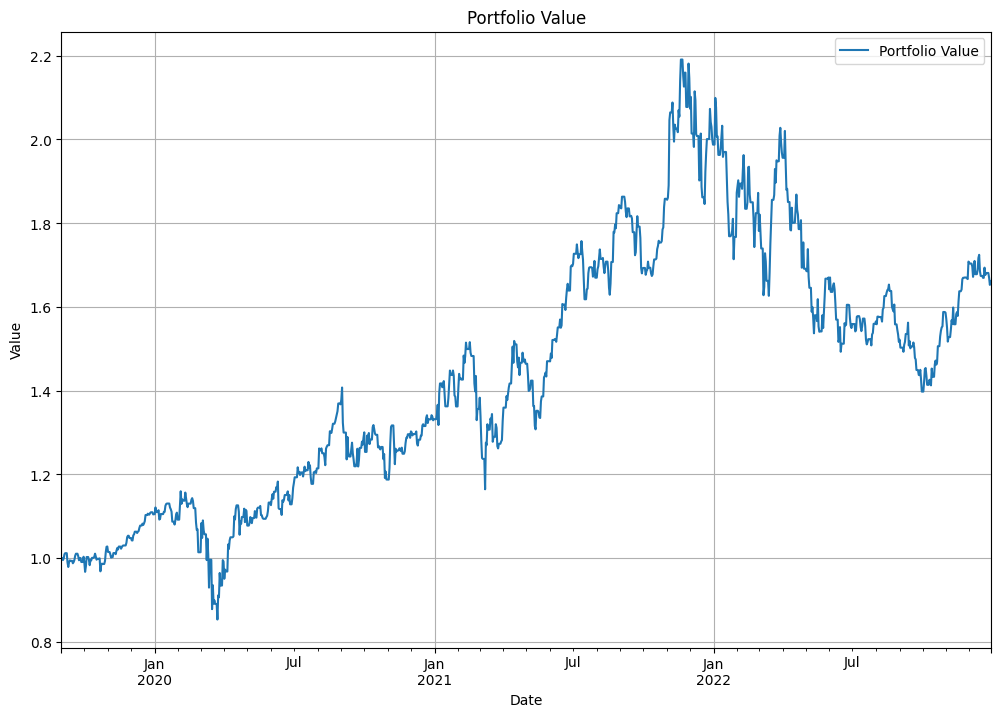

In [7]:
st_dominance_var = BackTest(main_data, StochasticDominVar)
st_dominance_var.backtest(start_date, end_date, 20, 1, '1MS')
st_dominance_var.plot_portfolio_returns()
st_dominance_summary_var = st_dominance_var.get_summary()
print(st_dominance_summary_var)

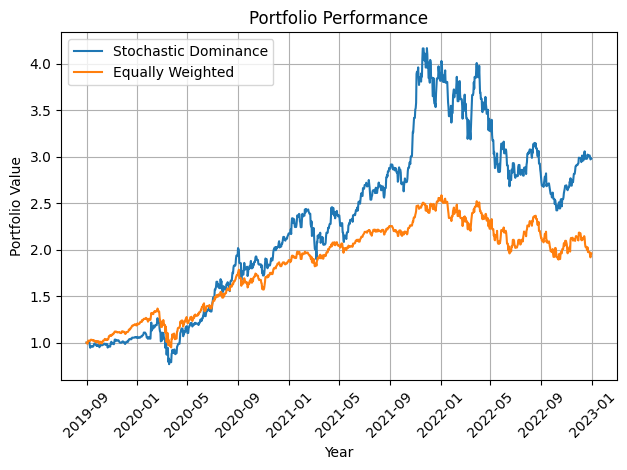

In [8]:
plt.plot(st_dominance.portfolio_value,label='Stochastic Dominance')
plt.plot(equalyWeighted_bt.portfolio_value,label='Equally Weighted')
plt.title('Portfolio Performance')
plt.ylabel('Portfolio Value')
plt.xlabel('Year')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

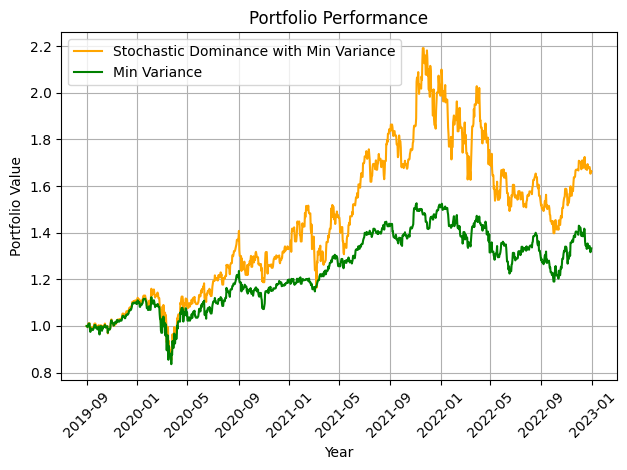

In [9]:
plt.plot(st_dominance_var.portfolio_value,label='Stochastic Dominance with Min Variance', color='orange')
plt.plot(min_var_bt.portfolio_value,label='Min Variance', color='green')
plt.title('Portfolio Performance')
plt.ylabel('Portfolio Value')
plt.xlabel('Year')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [10]:
# Stack all summaries dataframes
all_summaries = [equally_summary, st_dominance_summary, min_var_summary, st_dominance_summary_var]
all_summaries_df = pd.concat(all_summaries, axis=1)

all_summaries_df.columns = ['Equally Weighted','Stochastic Dominance Equally Weighted ', 'Min Variance',  'Stochastic Dominance with Min Variance']

all_summaries_df

,Equally Weighted,Stochastic Dominance Equally Weighted,Min Variance,Stochastic Dominance with Min Variance
Metric,,,,
Total Return,0.960680,1.979477,0.332566,0.662654
Mean Daily Return,0.000655,0.001116,0.000308,0.000571
Mean Yearly Retrun,0.179270,0.324692,0.080599,0.154711
Mean Daily SP500 Return,0.000256,0.000256,0.000256,0.000256
Mean Yearly SP500 Return,0.066748,0.066748,0.066748,0.066748
Std Dev of Daily Return,0.014162,0.020830,0.011941,0.017466
Sharpe Ratio,0.733698,0.850824,0.409000,0.518981
Sortino Ratio,0.784542,0.959774,0.437497,0.597699
Max Drawdown,-0.305997,-0.418670,-0.255478,-0.362025
